In [25]:
# Install packages (only if not already installed)
%pip install qiskit
%pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Imports
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random

Counts from measurements: {'0000': 58, '0111': 63, '0101': 53, '1111': 58, '1101': 54, '0010': 67, '1001': 71, '1011': 65, '1000': 65, '1110': 64, '1100': 66, '0100': 73, '0011': 68, '0001': 70, '0110': 76, '1010': 53}
Random number generated: 1


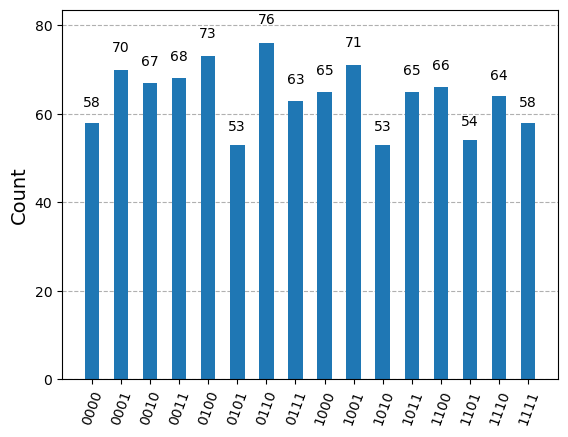

In [27]:
# Set the number of qubits and shots
num_qubits = 4
shots = 1024

# Step 1: Create a quantum circuit with 4 qubits
qc = QuantumCircuit(num_qubits, num_qubits)

# Step 2: Apply Hadamard gates to each qubit to create superposition
for qubit in range(num_qubits):
    qc.h(qubit)

# Step 3: Measure each qubit
qc.measure(range(num_qubits), range(num_qubits))

# Step 4: Execute the circuit on a simulator
simulator = AerSimulator()  # Use AerSimulator() directly
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(qc)

# Step 5: Choose a random measurement outcome
measured_outcomes = list(counts.keys())
random_outcome = random.choice(measured_outcomes)
random_number = int(random_outcome, 2)  # Convert binary outcome to decimal

# Display results
print("Counts from measurements:", counts)
print("Random number generated:", random_number)
plot_histogram(counts)